AIM: Data Cleaning & Preprocessing - Boston Housing Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('/content/HousingData.csv')

print("First 5 rows of dataset:")
print(df.head())

First 5 rows of dataset:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


In [ ]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None


In [ ]:
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


In [ ]:
df = df.fillna(df.median())

print("\nMissing values after treatment:")
print(df.isnull().sum())


Missing values after treatment:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [ ]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.479140   10.768775   11.028893    0.067194    0.554695    6.284634   
std      8.570832   23.025124    6.704679    0.250605    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.083235    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.253715    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      2.808720    0.000000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.845850    3.795043    9.549407  408.237154   18.455534  356.674032   
std   

In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outlier_count = ((df[col] < lower) | (df[col] > upper)).sum()
    print(f"{col}: {outlier_count} outliers detected")

CRIM: 81 outliers detected
ZN: 126 outliers detected
INDUS: 0 outliers detected
CHAS: 34 outliers detected
NOX: 0 outliers detected
RM: 30 outliers detected
AGE: 0 outliers detected
DIS: 5 outliers detected
RAD: 0 outliers detected
TAX: 0 outliers detected
PTRATIO: 15 outliers detected
B: 77 outliers detected
LSTAT: 12 outliers detected
MEDV: 40 outliers detected


In [ ]:
df[col] = np.where(df[col] < lower, lower, np.where(df[col] > upper, upper, df[col]))

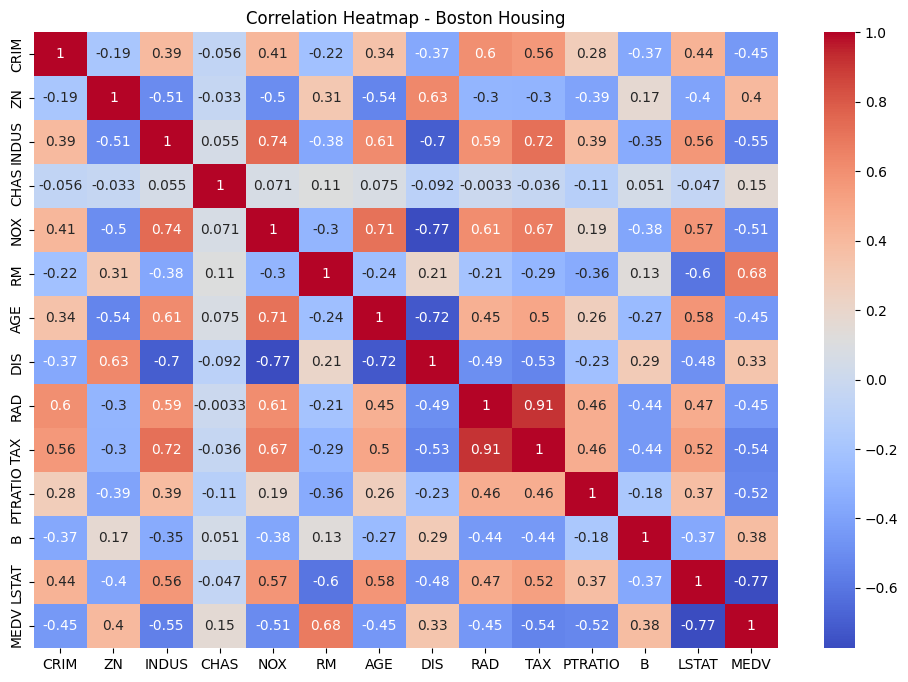

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap - Boston Housing")
plt.show()

In [ ]:
scaler = StandardScaler()
X = df.drop('MEDV', axis=1)
y = df['MEDV']

scaled_X = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_X, columns=X.columns)
scaled_df['MEDV'] = y

print("\nScaled Dataset Sample:")
print(scaled_df.head())


Scaled Dataset Sample:
       CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0 -0.405592  0.314369 -1.301706 -0.268391 -0.144217  0.413672 -0.132771   
1 -0.403140 -0.468160 -0.591052 -0.268391 -0.740262  0.194274  0.366141   
2 -0.403142 -0.468160 -0.591052 -0.268391 -0.740262  1.282714 -0.282080   
3 -0.402549 -0.468160 -1.321115 -0.268391 -0.835284  1.016303 -0.839258   
4 -0.398265 -0.468160 -1.321115 -0.268391 -0.835284  1.228577 -0.533356   

        DIS       RAD       TAX   PTRATIO         B     LSTAT  MEDV  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.096193  24.0  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.502779  21.6  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.231709  34.7  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.387195  33.4  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -0.176116  36.2  


In [ ]:
scaled_df.to_csv("boston_cleaned.csv", index=False)
print("\nCleaned dataset saved as 'boston_cleaned.csv'")


Cleaned dataset saved as 'boston_cleaned.csv'


In [ ]:
cleaned_df = pd.read_csv("boston_cleaned.csv")

print("Missing values in each column of cleaned dataset:")
print(cleaned_df.isnull().sum())

print("\nOutlier detection in cleaned dataset:")
for col in cleaned_df.select_dtypes(include=[np.number]).columns:
    Q1 = cleaned_df[col].quantile(0.25)
    Q3 = cleaned_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outlier_count = ((cleaned_df[col] < lower) | (cleaned_df[col] > upper)).sum()
    print(f"{col}: {outlier_count} outliers detected")

Missing values in each column of cleaned dataset:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Outlier detection in cleaned dataset:
CRIM: 81 outliers detected
ZN: 126 outliers detected
INDUS: 0 outliers detected
CHAS: 34 outliers detected
NOX: 0 outliers detected
RM: 30 outliers detected
AGE: 0 outliers detected
DIS: 5 outliers detected
RAD: 0 outliers detected
TAX: 0 outliers detected
PTRATIO: 15 outliers detected
B: 77 outliers detected
LSTAT: 12 outliers detected
MEDV: 0 outliers detected
